Accuracy: 0.75

Confusion Matrix:
[[6 2]
 [3 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.82      0.75      0.78        12

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



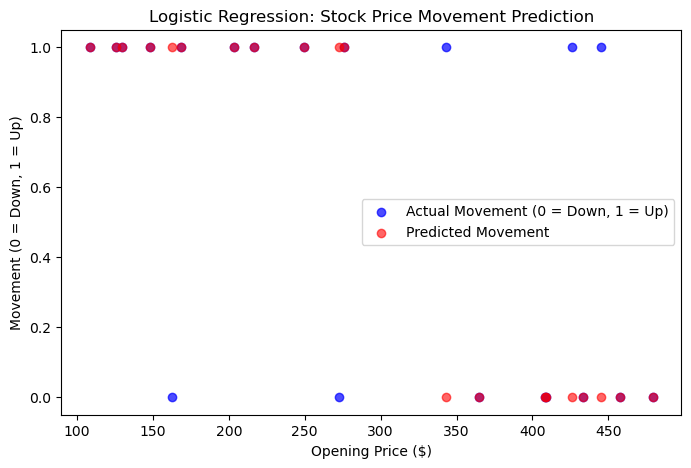

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Simulating a small stock market dataset
np.random.seed(42)

data_size = 100
opening_price = np.random.uniform(100, 500, data_size)  # Opening price between $100 and $500
closing_price = opening_price + np.random.randn(data_size) * 5  # Closing price with slight variation

# Creating a binary target variable: 1 if stock went up, 0 if it went down or stayed the same
movement = (closing_price > opening_price).astype(int)

# Creating a DataFrame
df = pd.DataFrame({
    'Opening Price': opening_price,
    'Closing Price': closing_price,
    'Movement': movement  # Target Variable (1 = Up, 0 = Down)
})

# Defining features (X) and target (y)
X = df[['Opening Price']]
y = df['Movement']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing Decision Boundary
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Movement (0 = Down, 1 = Up)", alpha=0.7)
plt.scatter(X_test, y_pred, color='red', label="Predicted Movement", alpha=0.6)
plt.xlabel("Opening Price ($)")
plt.ylabel("Movement (0 = Down, 1 = Up)")
plt.title("Logistic Regression: Stock Price Movement Prediction")
plt.legend()
plt.show()